In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn

import seaborn as sns

%matplotlib inline


In [107]:
# Read power generation data
production = pd.read_csv("./data/time_series_60min_singleindex_filtered.csv",
                        parse_dates=[0], index_col=0)
production.head()

,cet_cest_timestamp,DE_solar_capacity,DE_solar_generation_actual,DE_wind_capacity,DE_wind_generation_actual
utc_timestamp,,,,,
2012-01-01 00:00:00+00:00,2012-01-01T01:00:00+0100,26053,0.0,26663,4871.0
2012-01-01 01:00:00+00:00,2012-01-01T02:00:00+0100,26053,0.0,26663,5409.0
2012-01-01 02:00:00+00:00,2012-01-01T03:00:00+0100,26053,0.0,26663,6094.0
2012-01-01 03:00:00+00:00,2012-01-01T04:00:00+0100,26053,0.0,26663,6734.0
2012-01-01 04:00:00+00:00,2012-01-01T05:00:00+0100,26053,0.0,26663,7370.0


In [108]:
production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2012-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cet_cest_timestamp          43846 non-null  object 
 1   DE_solar_capacity           43848 non-null  int64  
 2   DE_solar_generation_actual  43802 non-null  float64
 3   DE_wind_capacity            43848 non-null  int64  
 4   DE_wind_generation_actual   43844 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [109]:
production.isna().sum()

cet_cest_timestamp             2
DE_solar_capacity              0
DE_solar_generation_actual    46
DE_wind_capacity               0
DE_wind_generation_actual      4
dtype: int64

In [110]:
# just keep the columns relevant for the project, i.e. the total power generation and capacity
columns = ["DE_solar_capacity", 
           "DE_solar_generation_actual", 
           "DE_wind_capacity",
           "DE_wind_generation_actual"]

production = production[[col for col in columns]]
production = production.rename(columns={"DE_solar_capacity": "solar_capacity",
                                        "DE_solar_generation_actual": "solar_generation_actual",
                                        "DE_wind_capacity": "wind_capacity",
                                        "DE_wind_generation_actual": "wind_generation_actual"})
production.head()

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual
utc_timestamp,,,,
2012-01-01 00:00:00+00:00,26053,0.0,26663,4871.0
2012-01-01 01:00:00+00:00,26053,0.0,26663,5409.0
2012-01-01 02:00:00+00:00,26053,0.0,26663,6094.0
2012-01-01 03:00:00+00:00,26053,0.0,26663,6734.0
2012-01-01 04:00:00+00:00,26053,0.0,26663,7370.0


In [111]:
"""
When plotting solar and wind power generation over time (i.e. index), the following error kept on popping up:
plot float() argument must be a string or a number, not 'Timestamp'.
It appears that the matplotlib converters were deregistered.
The following code circumvents this issue.
"""
pd.plotting.register_matplotlib_converters()

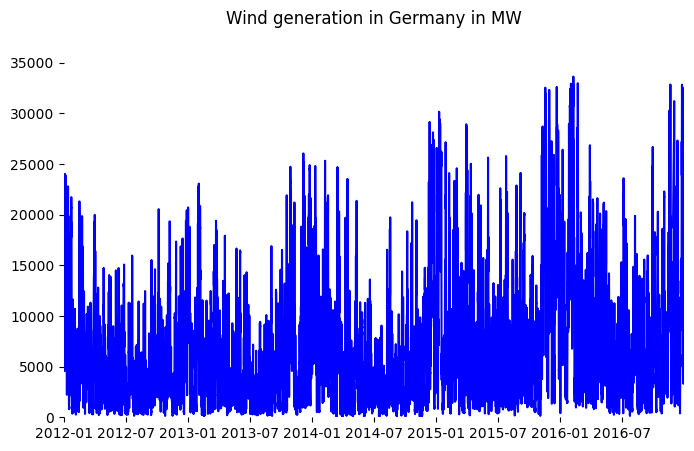

In [112]:
# Exploratory Data Analysis: create plot for wind power generation
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(production.index,
        production['wind_generation_actual'],
        color="b");
ax.set_title("Wind generation in Germany in MW");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,38000));
ax.set_frame_on(False);

# save plot
# plt.savefig("./figs/wind.png", dpi=200)

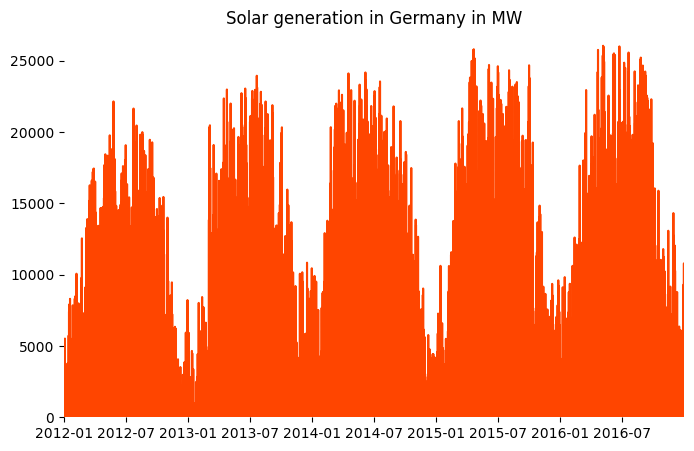

In [113]:
# Exploratory Data Analysis: create plot for solar power generation
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(production.index,
        production['solar_generation_actual'],
        color="OrangeRed");
ax.set_title("Solar generation in Germany in MW");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,27000));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/solar.png", dpi=200)

In [114]:
# Read weather data
weather = pd.read_csv("./data/weather_data_filtered.csv",
                     parse_dates=[0], index_col=0)
weather.head()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,
2012-01-01 00:00:00+00:00,4.856395,4.951,0.0,0.0
2012-01-01 01:00:00+00:00,5.014463,5.200,0.0,0.0
2012-01-01 02:00:00+00:00,5.214175,5.468,0.0,0.0
2012-01-01 03:00:00+00:00,5.401187,5.767,0.0,0.0
2012-01-01 04:00:00+00:00,5.564620,6.038,0.0,0.0


In [115]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2012-01-01 00:00:00+00:00 to 2016-12-31 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DE_windspeed_10m                 43848 non-null  float64
 1   DE_temperature                   43848 non-null  float64
 2   DE_radiation_direct_horizontal   43848 non-null  float64
 3   DE_radiation_diffuse_horizontal  43848 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


In [116]:
weather.isna().sum()

DE_windspeed_10m                   0
DE_temperature                     0
DE_radiation_direct_horizontal     0
DE_radiation_diffuse_horizontal    0
dtype: int64

In [117]:
weather.head()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,
2012-01-01 00:00:00+00:00,4.856395,4.951,0.0,0.0
2012-01-01 01:00:00+00:00,5.014463,5.200,0.0,0.0
2012-01-01 02:00:00+00:00,5.214175,5.468,0.0,0.0
2012-01-01 03:00:00+00:00,5.401187,5.767,0.0,0.0
2012-01-01 04:00:00+00:00,5.564620,6.038,0.0,0.0


In [118]:
"""
Since the number and nature of weather data from the dataset are believed not to be comprehensible enough.
Another dataset found on https://www.renewables.ninja/ could complete the original weather dataset since it contained information on:
- precipitation in mm/hour (PRECTOTLAND in MERRA-2) 
- temperature at 2 metres above ground in degrees C (T2M in MERRA-2)
- irradiance at ground level (_surface) in W/m^2 (SWGDN in MERRA-2)
- irradiance at top of atmosphere (_toa) in W/m^2 (SWTDN in MERRA-2)
- snowfall in mm/hour (PRECSNOLAND in MERRA-2)
- snow_mass in kg/m^2 (SNOMAS in MERRA-2)
- cloud_cover as a fraction [0,1] (CLDTOT in MERRA-2)
- air_density at ground level in kg/m^3 (RHOA in MERRA-2)
"""
weather_2 = pd.read_csv("./data/ninja_weather_country_DE_merra-2_population_weighted.csv",
                        parse_dates=[0], index_col=0)
weather_2.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,
2012-01-01 00:00:00+00:00,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199


In [119]:
weather = pd.merge(weather, weather_2, how='inner', left_index=True, right_index=True)
weather.head()

,DE_windspeed_10m,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4.856395,4.951,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,5.014463,5.200,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,5.214175,5.468,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,5.401187,5.767,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,5.564620,6.038,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199


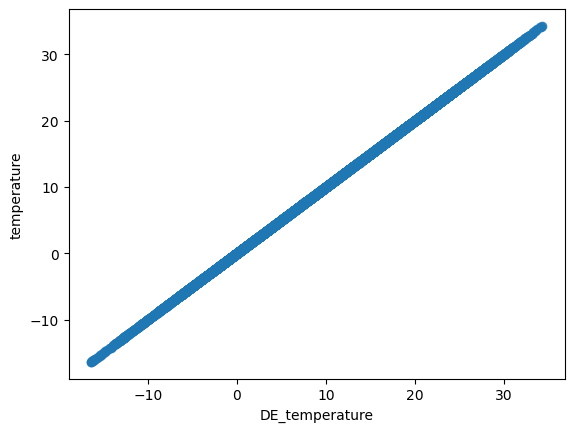

In [120]:
# plot and compare the two temperature features to see why they seem to differ
# plt.scatter(weather["DE_temperature"], weather["temperature"])
sns.regplot(data=weather,
            x="DE_temperature",
            y="temperature");

In [121]:
weather[["DE_temperature", "temperature"]].corr()

,DE_temperature,temperature
DE_temperature,1.0,1.0
temperature,1.0,1.0


In [122]:
"""
Since there's no information on how the mean temperature for Germany was calculated for both temperature features
And since their values are not significantly different
We can drop any of the two features for further analysis
"""
weather = (weather
           .drop(columns= "DE_temperature")
           .rename(columns={"DE_windspeed_10m": "windspeed_10m", 
                            "DE_radiation_direct_horizontal": "radiation_direct_horizontal",
                            "DE_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}))
weather.head()

,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4.856395,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,5.014463,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,5.214175,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,5.401187,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,5.564620,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199


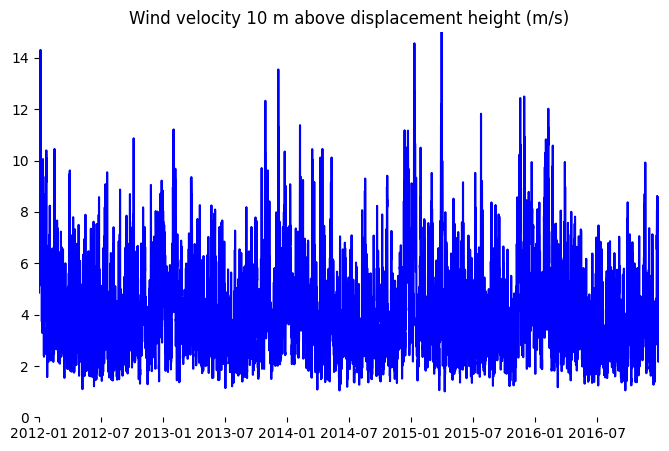

In [123]:
# Exploratory Data Analysis: create plot for wind velocity over time

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['windspeed_10m'],
        color="b");
ax.set_title("Wind velocity 10 m above displacement height (m/s)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,15));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/windspeed.png", dpi=200)

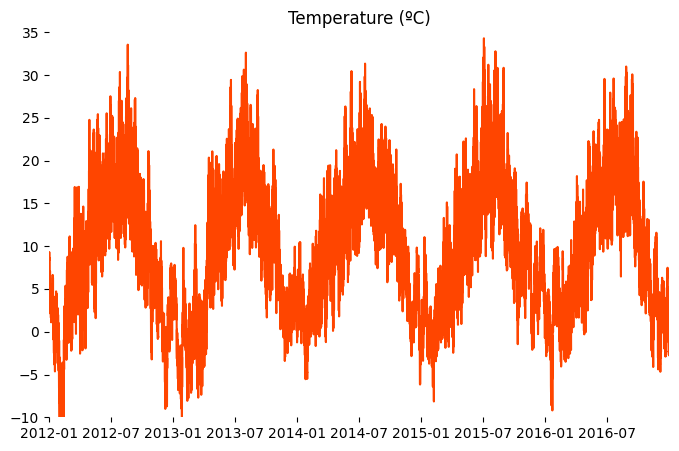

In [124]:
# Exploratory Data Analysis: create plot for temperature

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['temperature'],
        color="OrangeRed");
ax.set_title("Temperature (ºC)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((-10,35));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/temperature.png", dpi=200)

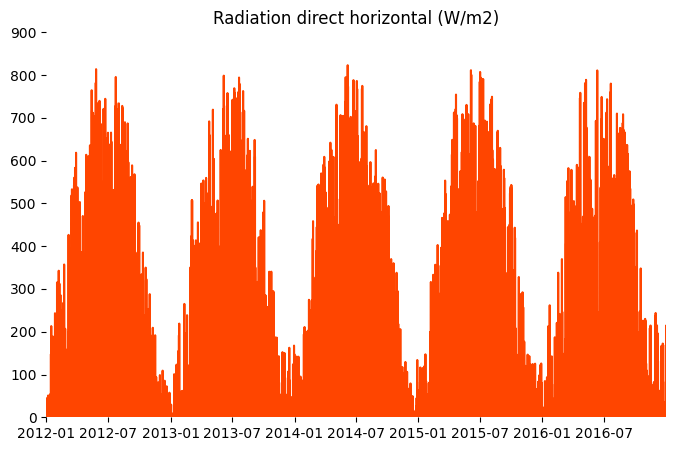

In [125]:
# Exploratory Data Analysis: create plot for radiation direct horizontal

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['radiation_direct_horizontal'],
        color="OrangeRed");
ax.set_title("Radiation direct horizontal (W/m2)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,900));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/radiation_direct_horizontal.png", dpi=200)

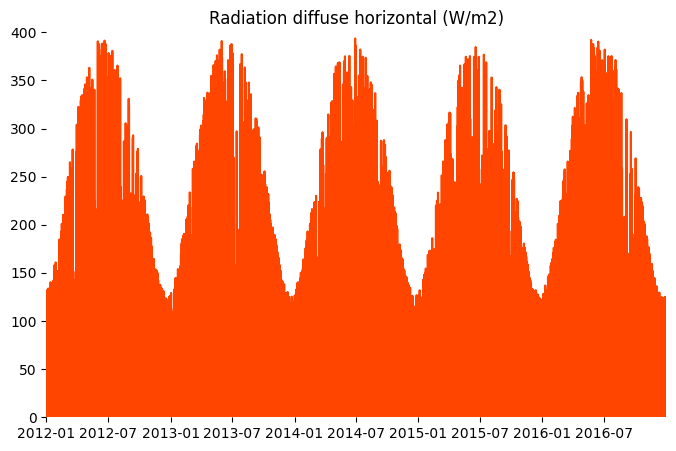

In [126]:
# Exploratory Data Analysis: create plot for radiation diffuse horizontal

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['radiation_diffuse_horizontal'],
        color="OrangeRed");
ax.set_title("Radiation diffuse horizontal (W/m2)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,400));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/radiation_diffuse_horizontal.png", dpi=200)

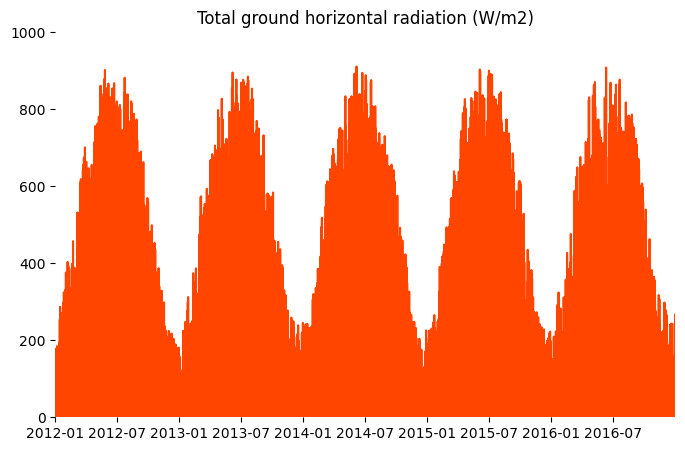

In [127]:
# Exploratory Data Analysis: create plot for irrandiance surface

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['irradiance_surface'],
        color="OrangeRed");
ax.set_title("Total ground horizontal radiation (W/m2)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,1000));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/irradiance_surface.png", dpi=200)

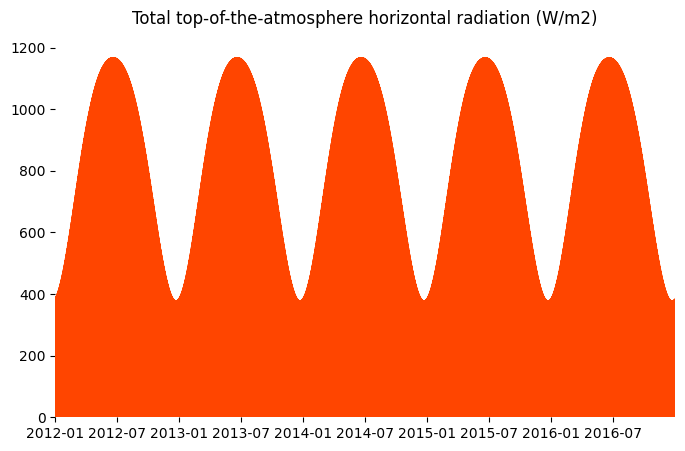

In [128]:
# Exploratory Data Analysis: create plot for irradiance top-of-the-atmosphere

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weather.index,
        weather['irradiance_toa'],
        color="OrangeRed");
ax.set_title("Total top-of-the-atmosphere horizontal radiation (W/m2)");
ax.set_xlim((pd.to_datetime("2012-01-01"), pd.to_datetime("2016-12-31")));
ax.set_ylim((0,1250));
ax.set_frame_on(False);

# save plot
# plt.savefig("figs/irradiance_toa.png", dpi=200)

In [129]:
# merge production and weather DataFrames
combined = pd.merge(production, weather, how='inner', left_index=True, right_index=True)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,26053,0.0,26663,4871.0,4.856395,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,26053,0.0,26663,5409.0,5.014463,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,26053,0.0,26663,6094.0,5.214175,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,26053,0.0,26663,6734.0,5.401187,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,26053,0.0,26663,7370.0,5.564620,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0079,-1.932,0.0,0.0,0.0017,0.0617,0.4790,1.2769
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0080,-2.090,0.0,0.0,0.0022,0.0631,0.4962,1.2775
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0075,-2.289,0.0,0.0,0.0022,0.0646,0.4924,1.2782


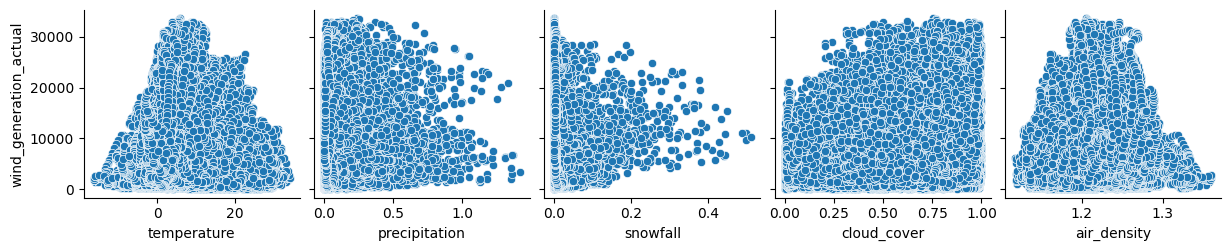

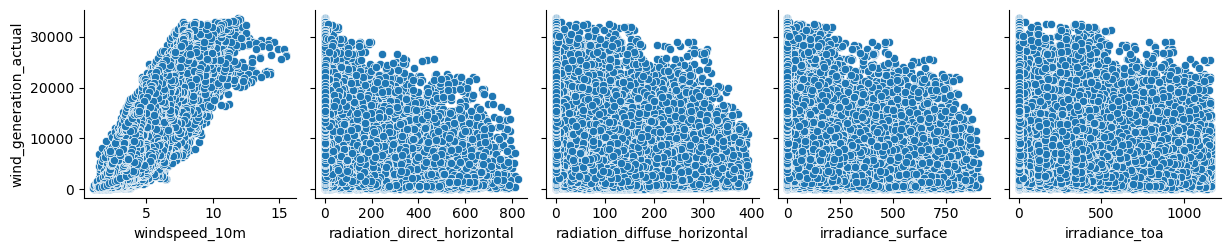

In [130]:
# Let's plot the generation of wind power (MWh) vs. weather data features
combined.reset_index(drop=True, inplace=True)
sns.pairplot(combined, x_vars=['temperature', 'precipitation', 'snowfall', 'cloud_cover', 'air_density'], y_vars=['wind_generation_actual'])
sns.pairplot(combined, x_vars=['windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa'], y_vars=['wind_generation_actual'])

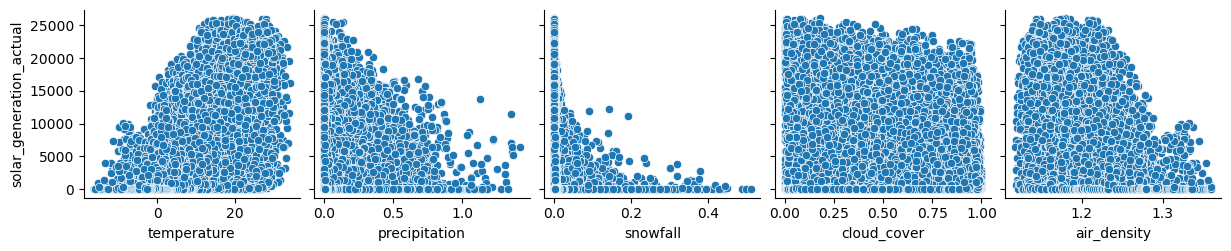

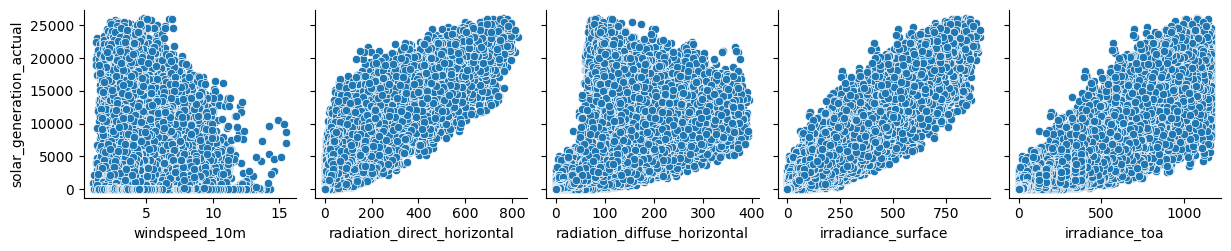

In [131]:
# Let's plot the generation of solar power (MWh) vs. weather data features
combined.reset_index(drop=True, inplace=True)
sns.pairplot(combined, x_vars=['temperature', 'precipitation', 'snowfall', 'cloud_cover', 'air_density'], y_vars=['solar_generation_actual'])
sns.pairplot(combined, x_vars=['windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa'], y_vars=['solar_generation_actual'])

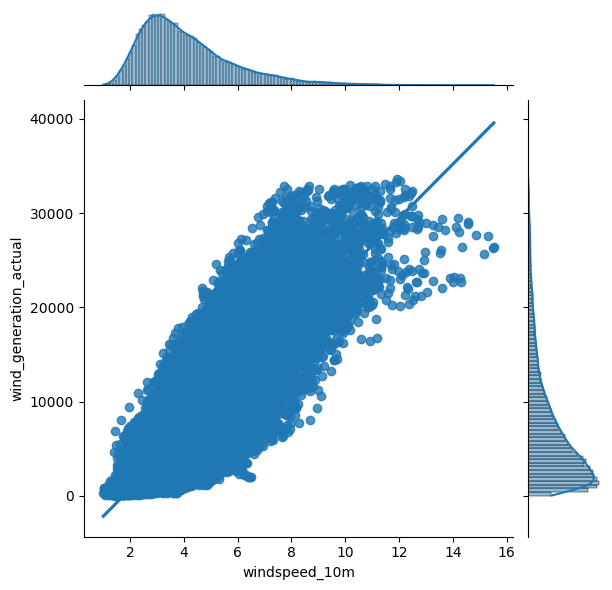

In [132]:
# There seems to be a linear relation between the wind power generation and the wind velocities 
sns.jointplot(x='windspeed_10m', y='wind_generation_actual', data=combined, kind='reg')

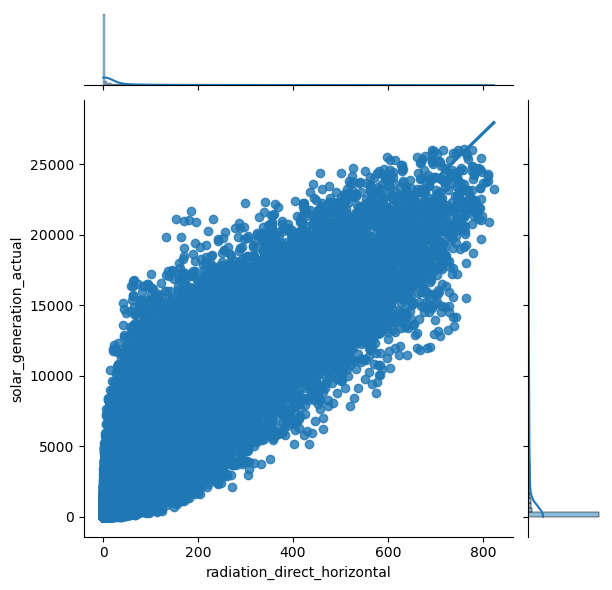

In [133]:
# There seems to be a linear relation between the solar power generation and the direct radiation 
sns.jointplot(x='radiation_direct_horizontal', y='solar_generation_actual', data=combined, kind='reg')

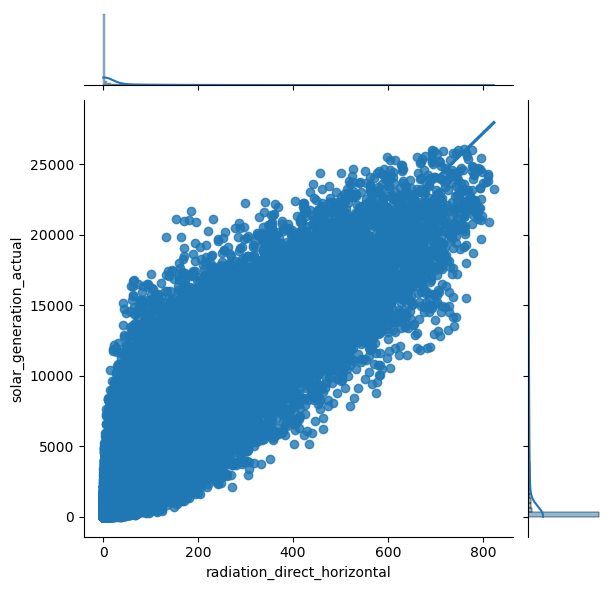

In [134]:
# There seems to be a linear relation between the solar power generation and the direct radiation 
sns.jointplot(x='radiation_direct_horizontal', y='solar_generation_actual', data=combined, kind='reg')

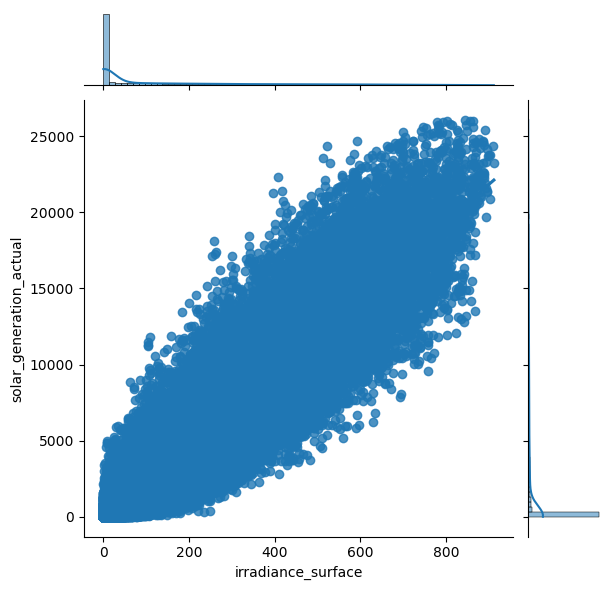

In [135]:
# There may be a correlation between between  solar power generation and the irrandiance surface 
sns.jointplot(x='irradiance_surface', y='solar_generation_actual', data=combined, kind='reg')

In [136]:
combined.isna().sum()

solar_capacity                   0
solar_generation_actual         44
wind_capacity                    0
wind_generation_actual           4
windspeed_10m                    0
radiation_direct_horizontal      0
radiation_diffuse_horizontal     0
precipitation                    0
temperature                      0
irradiance_surface               0
irradiance_toa                   0
snowfall                         0
snow_mass                        0
cloud_cover                      0
air_density                      0
dtype: int64

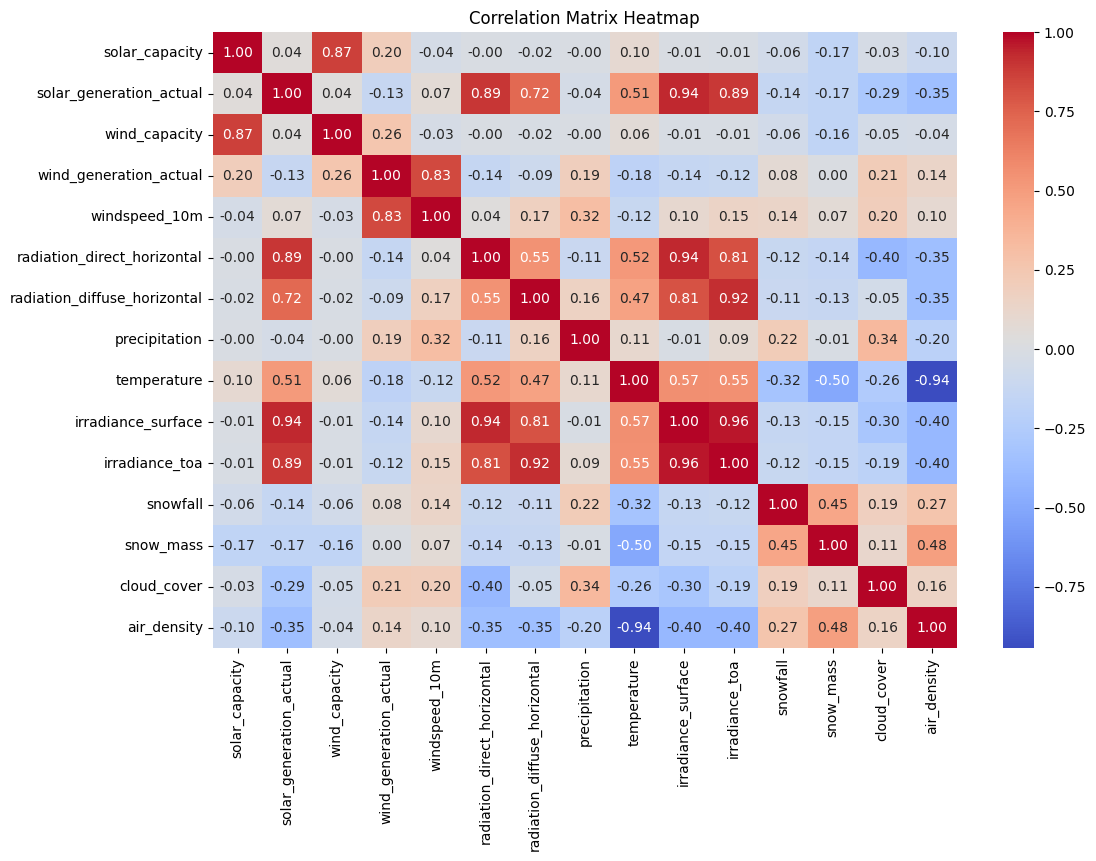

In [137]:
# Let's check for multicollinearity amongst the different features
corr_matrix = combined.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()